# Task 6: Web Scraping and Analysis of Job Postings

## 📥 Step 1: Load and Inspect the Retail Sales Dataset

In this step, we begin by loading the retail sales dataset and inspecting its structure.  
We’ll use the Walmart Sales Forecasting dataset from Kaggle, which contains weekly sales data across multiple stores and departments.

### 🔍 Objective

- Load the dataset into a DataFrame
- Convert the `Date` column to datetime format
- Preview the first few rows to understand the schema

### 📄 Dataset Fields

Typical columns include:
- `Store`: Store ID
- `Dept`: Department ID
- `Date`: Week ending date
- `Weekly_Sales`: Sales amount for that week
- `IsHoliday`: Boolean flag for holiday weeks

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("train.csv")

# Convert date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Preview structure
print(df.shape)
df.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


## 📊 Step 2: Aggregate Monthly Sales and Plot Trend

In this step, we convert weekly sales data into monthly totals to observe broader trends.  
This helps smooth out short-term fluctuations and reveals long-term patterns in retail performance.

### 🎯 Objective

- Group weekly sales by month
- Sum total sales per month across all stores and departments
- Plot the monthly sales trend to visualize growth, dips, or seasonality

### 🔍 Approach

1. Convert `Date` to monthly periods using `.dt.to_period("M")`
2. Group by month and sum `Weekly_Sales`
3. Convert back to timestamp for plotting
4. Plot the time series using Matplotlib

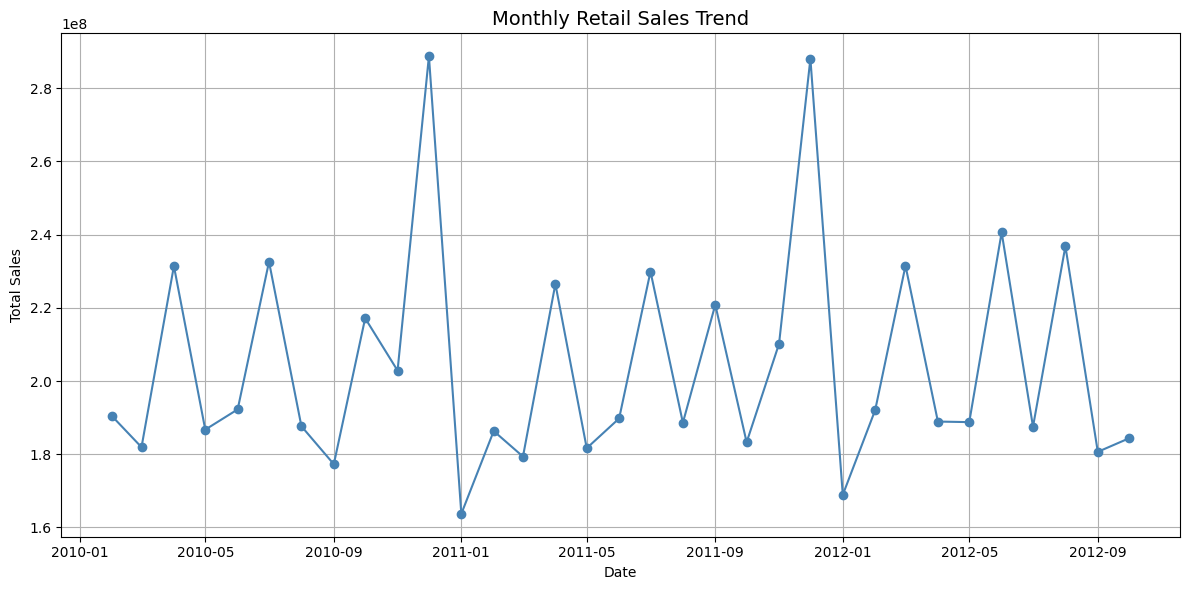

In [4]:
import matplotlib.pyplot as plt

# Group by month and sum sales
monthly_sales = df.groupby(df["Date"].dt.to_period("M"))["Weekly_Sales"].sum().reset_index()
monthly_sales["Date"] = monthly_sales["Date"].dt.to_timestamp()

# Plot monthly trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales["Date"], monthly_sales["Weekly_Sales"], marker="o", color="steelblue")
plt.title("Monthly Retail Sales Trend", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

### 🔍 Observations

- **Seasonal Peaks**  
  Sales spike consistently in **December**, reflecting holiday shopping surges.  
  Smaller peaks are visible in **October and November**, likely tied to pre-holiday promotions.

- **Mid-Year Dips**  
  Sales tend to decline during **summer months** (June–August), suggesting reduced consumer activity or fewer retail campaigns.

- **Year-End Recovery**  
  After summer, sales rebound in **Q4**, indicating strong seasonal cycles in retail demand.

- **Overall Stability**  
  Monthly sales fluctuate between \$180M and \$280M, showing a relatively stable baseline across the 3-year period.

- **Anomalies**  
  A sharp spike in **October 2010** may reflect a major event, promotion, or external factor worth investigating.

### 🧠 Insights

- Retail sales are **strongly seasonal**, with predictable high and low periods.
- Planning around these cycles is essential for inventory, staffing, and marketing.
- Future forecasting models should incorporate **seasonality and holiday effects** to improve accuracy.


## 📉 Step 3: Add Moving Averages for Smoothing

To better understand the underlying trend in monthly retail sales, we apply a **moving average**.  
This technique smooths out short-term noise and highlights long-term patterns.

### 🎯 Objective

- Apply a 3-month moving average to the monthly sales data
- Overlay the smoothed line on top of the original sales trend
- Visually compare raw vs. smoothed performance

### 🔍 Approach

1. Use `.rolling(window=3).mean()` to compute the moving average
2. Plot both the original and smoothed sales lines
3. Highlight how smoothing clarifies seasonal cycles and trend direction

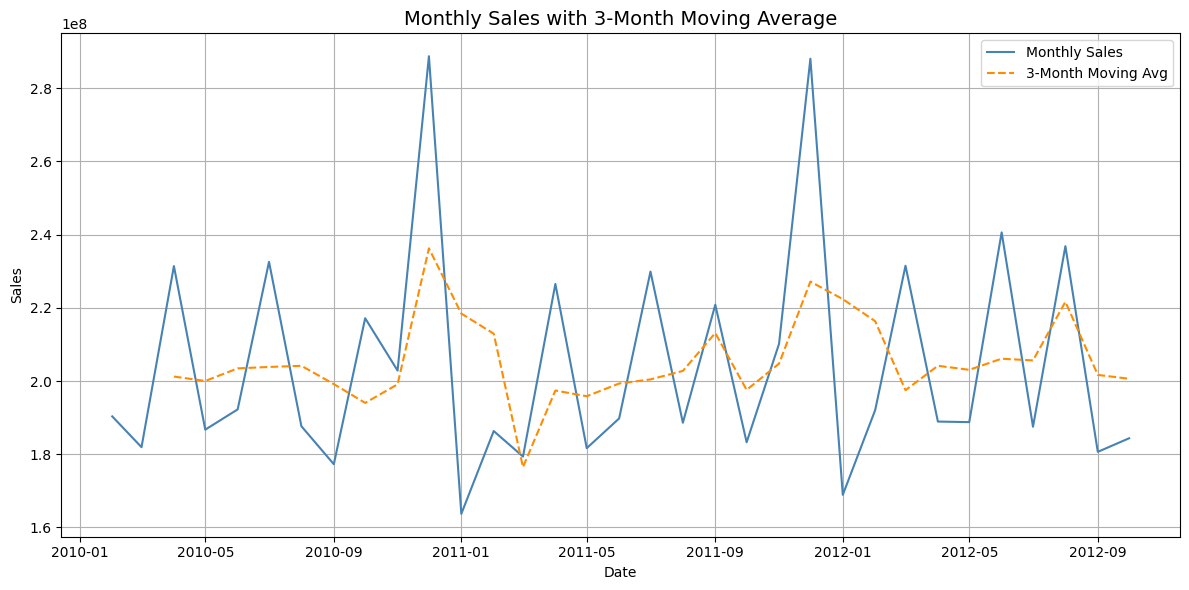

In [5]:
# Calculate 3-month moving average
monthly_sales["MA_3"] = monthly_sales["Weekly_Sales"].rolling(window=3).mean()

# Plot original vs. smoothed sales
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales["Date"], monthly_sales["Weekly_Sales"], label="Monthly Sales", color="steelblue")
plt.plot(monthly_sales["Date"], monthly_sales["MA_3"], label="3-Month Moving Avg", linestyle="--", color="darkorange")
plt.title("Monthly Sales with 3-Month Moving Average", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 🔍 Observations

- **Smoothed Trend Line**  
  The orange dashed line (3-month moving average) smooths out the noise from monthly spikes and dips, making it easier to observe consistent patterns.

- **Seasonal Cycles**  
  The moving average confirms recurring peaks in **Q4** (October–December), aligning with holiday-driven sales surges.  
  It also highlights **mid-year slowdowns** during summer months.

- **Trend Stability**  
  The smoothed line shows that while sales fluctuate seasonally, the overall trend remains **relatively stable** across the 3-year period.

- **Lag Effect**  
  The moving average slightly lags behind actual sales peaks and troughs, which is expected due to the averaging window.

### 🧠 Insights

- Moving averages are effective for **trend detection** in noisy time series data.
- Retail planning should account for **seasonal highs and lows**, especially in Q4.
- This smoothing technique can be extended to longer windows or used as input for forecasting models.


## 🏬 Step 4: Break Down Sales by Store or Department

To gain deeper insight into retail performance, we break down monthly sales by **store** and **department**.  
This helps identify which locations or product categories drive revenue and whether they follow similar seasonal patterns.

### 🎯 Objective

- Group sales by month and store (or department)
- Visualize how each store contributes to monthly revenue
- Compare performance across stores or departments over time

### 🔍 Approach

1. Convert `Date` to monthly periods
2. Group by month and `Store`, summing `Weekly_Sales`
3. Unstack the result to create a matrix: rows = months, columns = stores
4. Plot the time series for each store

<Figure size 1400x600 with 0 Axes>

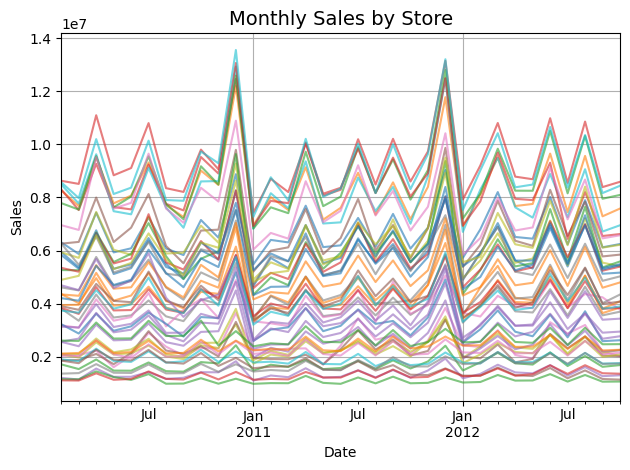

In [6]:
# Monthly sales by store
store_monthly = df.groupby([df["Date"].dt.to_period("M"), "Store"])["Weekly_Sales"].sum().unstack()
store_monthly.index = store_monthly.index.to_timestamp()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
store_monthly.plot(legend=False, alpha=0.6)
plt.title("Monthly Sales by Store", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.grid(True)
plt.show()


### 🔍 Observations

- **Seasonal Spikes**  
  Most stores show noticeable sales spikes around **January each year**, indicating strong seasonal demand likely tied to post-holiday promotions or clearance cycles.

- **Consistent Patterns**  
  Despite differences in magnitude, many stores follow a **similar seasonal rhythm**, suggesting centralized promotional strategies or synchronized consumer behavior.

- **Performance Variation**  
  Some stores consistently outperform others, with monthly sales exceeding **\$10M**, while others remain below **\$5M**.  
  This may reflect differences in store size, location, product mix, or customer base.

- **Dense Data**  
  The chart includes dozens of overlapping lines, indicating a large number of stores.  
  While this gives a full picture, it may be useful to isolate top-performing stores for clearer insights.

### 🧠 Insights

- Store-level breakdown reveals **geographic and operational diversity** in retail performance.
- High-performing stores may warrant deeper analysis for best practices.
- Seasonal alignment across stores suggests centralized planning, but outliers may indicate local opportunities or challenges.


## 📈 Step 5: Simple Forecasting with Exponential Smoothing

To estimate future sales trends, we apply **exponential smoothing** to the monthly retail sales data.  
This method gives more weight to recent observations, making it responsive to recent changes while still smoothing out noise.

### 🎯 Objective

- Apply exponential smoothing to the monthly sales series
- Compare actual vs. smoothed values
- Use the smoothed line as a simple forecast baseline

### 🔍 Approach

1. Use `.ewm(span=3).mean()` to compute exponentially weighted moving average
2. Overlay the smoothed forecast on the original sales trend
3. Interpret how well the smoothed line captures momentum and direction

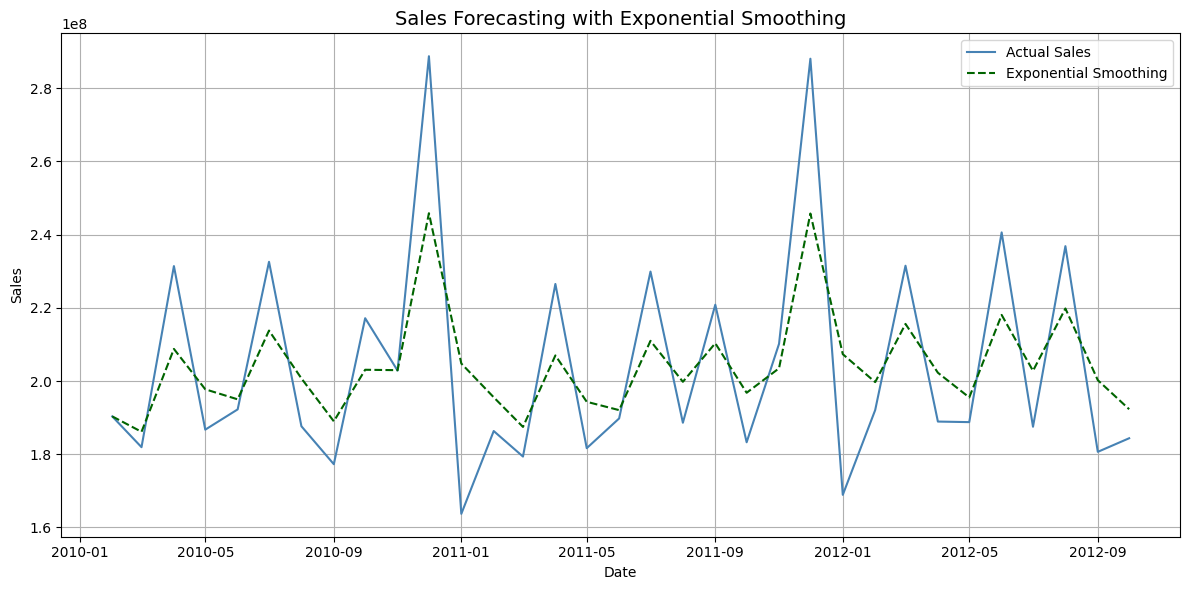

In [7]:
# Apply exponential smoothing
monthly_sales["ExpSmooth"] = monthly_sales["Weekly_Sales"].ewm(span=3, adjust=False).mean()

# Plot actual vs. smoothed forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales["Date"], monthly_sales["Weekly_Sales"], label="Actual Sales", color="steelblue")
plt.plot(monthly_sales["Date"], monthly_sales["ExpSmooth"], label="Exponential Smoothing", linestyle="--", color="darkgreen")
plt.title("Sales Forecasting with Exponential Smoothing", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 🔍 Observations

- **Trend Alignment**  
  The green dashed line closely follows the overall direction of actual sales, confirming that exponential smoothing effectively captures the momentum of the time series.

- **Noise Reduction**  
  Sharp peaks and dips in the actual sales line are softened in the smoothed forecast, making it easier to observe long-term behavior.

- **Responsiveness**  
  Compared to a simple moving average, exponential smoothing is more responsive to recent changes, which is useful for short-term forecasting.

- **Forecast Baseline**  
  The smoothed line can serve as a baseline for future projections, especially in environments with regular seasonality and stable trends.

### 🧠 Insights

- Exponential smoothing is a lightweight yet effective method for **trend forecasting** in retail data.
- It’s especially useful when you need a quick forecast without complex modeling.
- For more advanced forecasting, this technique can be extended into models like **Holt-Winters** or integrated with **ARIMA** or **Prophet**.